* * *
<pre> NYU Paris            <i> Artificial intelligence - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab 3: Playing with random variables  </h1>

<pre align="left"> May 31st 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Random numbers generation with numpy
- Get familiar with the law of large numbers and the central limit theorem


##  Random variables, the LLN and the CLT
Let $X$ be a random variable with mean $\mu$ and variance $\sigma^2$.

The law of large numbers states that the empirical mean $\bar{X_n} = \frac{1}{n} \sum_{i=1}^n X_i$ converges to the true mean $\mu$ as $n\to+\infty$.

The central limit theorem provides a rate of convergence as well as the distribution of the errors of the empirical mean as $n \to +\infty$:

$$\frac{\sqrt{n}}{\sigma} (\bar{X_n} - \mu) \sim \text{Gaussian}(0, 1)$$



We are going to test this result empirically. 
In the rest of this section, $X$ is a Bernoulli random variable (fair coin flip).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1
What is the mean and variance of $X$ ?

For any discrete random variable taking the values $a_1, \dots, a_K$ with probabilities $p_1, \dots, p_K$
such that $\sum_{i=1}^K p_i = 1$ then:
$Mean(X) = Expectation(X) = \mathbb{E}(X) = \sum_{i=1}^K p_k a_k = \langle p, a\rangle = p^\top a$

In the case of a Bernoulli, X takes 0 or 1 with probability 1/2 each. Therefore $\mu = 0 \times 1/2 + 1 \times 1/2 = 1/2$

$\mathbb{V}(X) = \mathbb{E}\left((X - \mathbb{E}(X))^2\right) = \mathbb{E}(X^2) - (\mathbb{E}(X))^2$

For the $X \sim Bernoulli(1/2)$, $X^2 = X$ because X is either 0 or 1. Therefore:
$\mathbb{V}(X) = \mathbb{E}(X^2) - (\mathbb{E}(X))^2 = \mathbb{E}(X) - (1/2)^2 = 1/2 - 1/4 = 1/4 = 0.25$


The standard deviation of X is defined as:
$std(X) = \sqrt{\mathbb{V}(X)}$

For Bernoulli, $Std(X) = \sqrt{0.25} = 0.5$ 
### Question 2
Generate an sample of size 100 and compute its mean.

In [2]:
rng = np.random.RandomState(42)

In [40]:
X = rng.randint(2, size=100)
X

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [38]:
X = rng.randint(2, size=100)
X.mean()

0.46

### Question 3
Complete the following code to test the LLN theorem. We want to plot the errors: 
$$ error_n = |\bar{X_n} - limit| $$
and visualize their convergence to zero.

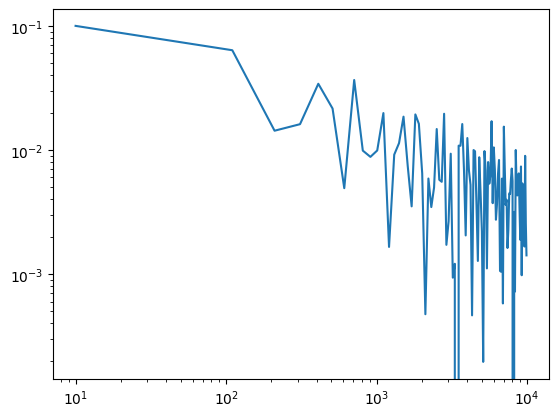

In [42]:
# expected limit
lln_limit = 0.5

ns = np.arange(10, 10000, 100)

# compute means here

errors = []
for n in ns:
    X = rng.randint(2, size=n)
    e_n = abs(X.mean() - lln_limit)
    errors.append(e_n)
    
plt.figure()
plt.plot(ns, errors)
plt.loglog()
plt.show()

### Question 4
As $n$ increases these errors (with the sign) should follow a Gaussian distribution. With a provided and fixed N, write a function that computes M samples of the error $E_n = \frac{\sqrt{n}}{\sigma} (\bar{X_n} - \mu)$

In [50]:
def generate_errors(n, M):
    # for bernoulli(0.5)
    mu = 0.5
    sigma = 0.5
    X = rng.randint(2, size=(n, M))
    E = (X.mean(axis=0) - mu) * (n ** 0.5) / sigma
    return E # E should be an array of size M

In [57]:
generate_errors(1000, 1000).mean()

-0.0039022506326477

### Question 5
Complete the following cell to plot a histogram of the errors and the true density.

Density of a Gaussian(0, 1):

$$f(x) = \frac{1}{\sqrt{2\pi} \sigma}  e^{-\frac{(x-\mu)^2}{2}}$$

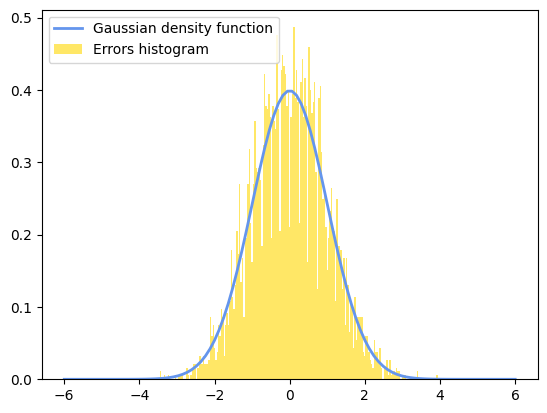

In [61]:
n = 10000
M = 5000
E = generate_errors(n, M)

x = np.linspace(-6, 6, 100)
density = np.exp(-x ** 2 / 2) / (2 * np.pi) ** 0.5

plt.figure()
plt.plot(x, density, color="cornflowerblue", lw=2, label="Gaussian density function")
plt.hist(E, bins=200, alpha=0.6, color="gold", label="Errors histogram", density=True)
plt.legend()
plt.show()

S / 10

### Question 6
Repeat this operation for lower values of n and display the same plot on different axes as n increases. What do you notice ? Do you know a way to evaluate this result other than visually ?

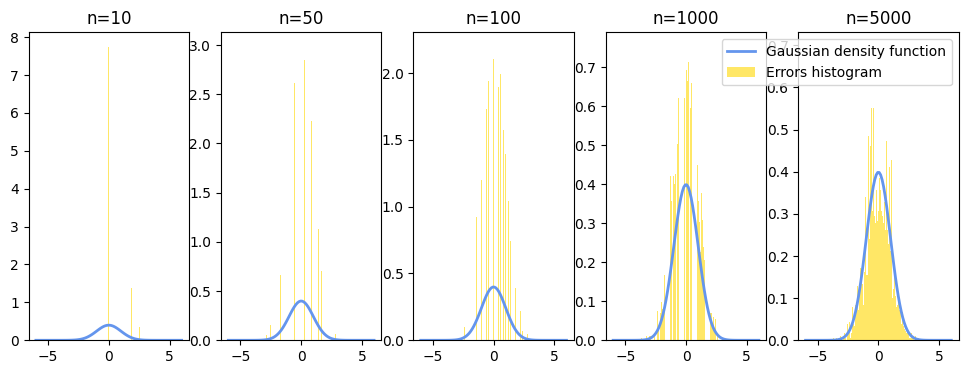

In [79]:
f, axes = plt.subplots(1, 5, figsize=(12, 4))
ns = [10, 50, 100, 1000, 5000]

x = np.linspace(-6, 6, 100)
density = np.exp(-x ** 2 / 2) / (2 * np.pi) ** 0.5

for n, ax in zip(ns, axes.ravel()):
    E = generate_errors(n, M)
    ax.plot(x, density, color="cornflowerblue", lw=2, label="Gaussian density function")
    ax.hist(E, bins=200, alpha=0.6, color="gold", label="Errors histogram", density=True)
    ax.set_title(f"n={n}")
plt.legend()
plt.show()


### Question 7
Repeat these experiments with a different choice of X. 


We do so with the Laplace distribution with position 0 and scale 1. (Mean 0 and variance 2). 

In [ ]:

n = 10
M = 2500
mu = 0.
b = 1.
sigma = (2 * b ** 2) ** 0.5
X = rng.laplace(loc=mu, scale=b, size=(n, M))
E = (X.mean(axis=0) - mu) * (n ** 0.5) / sigma
x = np.linspace(-6, 6, 100)
density = np.exp(-x ** 2 / 2) / (2 * np.pi) ** 0.5

plt.figure()
plt.plot(x, density, color="cornflowerblue", lw=2, label="Gaussian density function")
plt.hist(E, bins=200, alpha=0.6, color="gold", label="Errors histogram", density=True)
plt.legend()
plt.show()